In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import json
import matplotlib.pyplot as plt
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
GPU name: Tesla T4


In [ ]:
!pip install tqdm matplotlib

!git clone https://github.com/spro/char-rnn.pytorch.git
%cd char-rnn.pytorch

Cloning into 'char-rnn.pytorch'...
remote: Enumerating objects: 54, done.
remote: Total 54 (delta 0), reused 0 (delta 0), pack-reused 54 (from 1)
Receiving objects: 100% (54/54), 11.79 KiB | 11.79 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/char-rnn.pytorch


In [ ]:
!pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 2.8 MB/s eta 0:00:00


In [ ]:
!mkdir data
!curl https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt -o data/tinyshakespeare.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1089k  100 1089k    0     0  1907k      0 --:--:-- --:--:-- --:--:-- 1910k


In [ ]:
!python train.py data/tinyshakespeare.txt --n_epochs 200 --n_layers 2 --hidden_size 768 --chunk_len 200 --batch_size 128 --cuda

Using CUDA
Training for 200 epochs...
 50% 99/200 [01:10<01:16,  1.32it/s] 10s (100 50%) 1.6674]
What abour speing,
By the lod courst with the wearil alice,
Haming sorruse thee, no under all this sme 

100% 199/200 [02:22<00:00,  1.41it/s] 22s (200 100%) 1.4913]
Whe slose stame, as the more way and and must down north to the point
And let the fair in any.

ANGELO 

100% 200/200 [02:22<00:00,  1.40it/s]
Saving...
Saved as tinyshakespeare.pt


In [ ]:
!python generate.py tinyshakespeare.pt -p "ROMEO:" -l 750 -t 0.4

ROMEO:
A may may may marry to the penight so for the more made
To such a more is here had lives the cousin here pursed to the counsel,
That have be so more one to his fair country.

KING RICHARD III:
Why, what the consent that we man?

KING RICHARD III:
Where the more the name?

KING RICHARD III:
Why, that the lady to love?

KING RICHARD III:
Why, but the slave the instruct her along comes of thee?

RICHMOND:
The hath a man to my consent,
The ored to here of the common to be the comes of the thence here man, what so love to the more to the counsel to be the devil,
That the world to the counsel to the true heaven here to the not and the consent,
When I have so much a presence, the comes of the that the come the remember to the common and married
T


In [ ]:
!python generate.py tinyshakespeare.pt -p "ROMEO:" -l 750 -t 0.6

ROMEO:
What, that now since what I have were?

KATHARINA:
It the says, do your grace, and then under, that you mercy;
And I come, as it some thee, marry of order a bless
Agenelow hath in the place.

KING RICHARD II:
Why, let me to have at France
Whonself to your break the conduct is thee speak.

ESCALUS:
That, where that stay thou hast the countenness
To well made the cousins the comes,
That I do here I will be this discression king that I marry as the come.

KING RICHARD III:
I care he warm.

BENVOLIO:
What is a love?

TRANIO:
Why, let the godsess me but him a bellood?

KATHARINA:
And, and not a man more here, your mortal, some to look the rode me.

GREMIO:
O cousest of your good like other all,
Who so the strength, be so all the still draw in t


In [ ]:
!python generate.py tinyshakespeare.pt -p "ROMEO:" -l 750 -t 0.8

ROMEO:
Why, cannot consent,
The honour of his meat remember mes;
There of that it the comes of such water.

EDWARD:

KATHARINA:
You mother.

PAULINA:
En 'usily shall I the couse.

CATESTARINA:
Why, year so sea, come of Buckingham!

RICHMOND:
But have do even straight amongst counsel:
Aning were thee offording name?

KING EDWARD IV:
Avey so, your king, that rodes, the sandful man away, brother's look
To all the country in have a wrough, I have offence.

KING REWARD III:
The comes it all every that news be dost of comes,
Where wherein thee, less be our words the worst
That I would there execuliderected not then couse?

MIRANDA:
If very manterius serven etather.

KATHARINA:
Ay, say I hear there I have your consul.

JULIET:
JULIET:
You water, and see


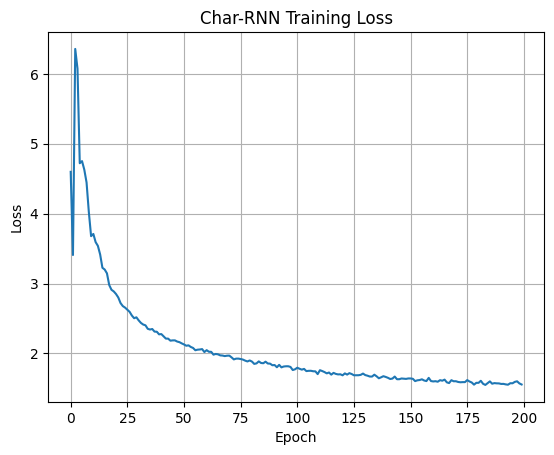

In [ ]:
with open('losses.json', 'r') as f:
    losses = json.load(f)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Char-RNN Training Loss")
plt.grid(True)
plt.show()

In [ ]:
generated_text = !python sample.py --checkpoint checkpoints/char-rnn_epoch1.pt
with open("sample_output.txt", "w") as f:
    f.write("\n".join(generated_text))